In [5]:
#import Pkg; Pkg.add("IterativeSolvers")
using LinearAlgebra
using IterativeSolvers  
using Plots

We are given the equation 
$$-\frac{\partial^{2}u}{\partial x^{2}} = f(x) \, , \quad f(x) = \pi^{2}sin(\pi x)$$

To find the solution $u$, to the system $$Au = b \, , \quad b = f(x)$$. 

Given the inner matrix,
$$ A = \frac{1}{\Delta x^2}
\begin{bmatrix} 2 & -1 & 0 & & 0  \\ 
-1 & 2 & -1 & & \vdots  \\
0 & -1 & 2 & & 0  \\ 
& & &  \ddots & -1 \\
0 & \ldots & 0 & -1 & 2
\end{bmatrix}_{(m-2) \times (m-2)}
$$

We first need to expand $A$ by finding the first and last rows using our boundary conditions, $u(a) = 0, u(b) = 0$ on the interval $[a,b] = [-1,1]$. To find the first and last rows of the matrix $A$, we will use the second-order derivative Finite Difference operator to solve the following equation for $i = 1,2, m-1, m $
$$ \frac{-u_{i-1} + 2 u_i - u_{i+1}}{\Delta x^2} = f(x_{i}) $$
= $$ -u_{i-1} + 2 u_i - u_{i+1} = f(x_{i})*\Delta x^2 $$

#### For $i = 1$:
$$ -u_{0} + 2 u_{1} - u_{2} = f(x_{1})*\Delta x^2 $$
Note: $u_{0}$ is out of domain, so we will just drop

Given $ f(x_{1}) = 0$
$$2 u_{1} - u_{2} = 0 *\Delta x^2 $$
= $$ u_{1} = \frac{ u_{2}}{2} $$

#### For i = 2
With $A_{(m-2) \times (m-2)}$,
$$A_{2,j} = [2, -1, 0, ..., 0] $$
so $$A_{2,j} \times u_{(m-2) \times 1)} = [2, -1, 0, ..., 0] \times \begin{bmatrix} u_2 \\ \vdots \\ u_{m-1}  \end{bmatrix}$$
= $$ 2 u_2 - u_{3} = 0$$
$$ 2 u_2 = u_3 $$

Thus 
$$ u_{1} = \frac{2 u_2}{2} $$
$$ u_{1} = 1$$

#### Similarly, for i = $m-1, m$
$$ -u_{m-1} + 2 u_{m} - u_{m+1} = f(x_{m})*\Delta x^2 $$
Note: $u_{m+1}$ is out of domain, so we will just drop

Given $ f(x_{m}) = 0$
$$- u_{m-1} + 2 u_{m} = 0 *\Delta x^2 $$
= $$ u_{m} = \frac{ u_{m-1}}{2} $$

With $A_{(m-2) \times (m-2)}$,
$$A_{m-2,j} = [0,..., 0, -1, 2] $$,
so $$A_{m-2,j} \times u_{(m-2) \times 1)} = [0,..., 0, -1, 2] \times \begin{bmatrix} u_2 \\ \vdots \\ u_{m-1}  \end{bmatrix}$$
$$ - u_{m-2} + 2 u_{m-1} = 0 $$
$$ 2 u_{m-1} = u_{m-2} $$

Thus 
$$ u_{m} = \frac{2 u_{m-1}}{2} $$
$$ u_{m} = 1$$

Now that we have our full $A$ matrix, we will solve for the system
$$Au = b\Delta x^{2}$$

#### Define functions

In [178]:
#Define function f(x) and actual solution, u(x)  
f(x) = pi^2*sin(pi*x)
u(x) = sin(pi*x)

#Define iterative Jacobi method to find solution u, to Au = b
function jacobi_iter(A, b, maxiter)
    #Define M = D = diag(A) and L, U as strict upper and lower triangular matrices
    M = Diagonal(A)
    U = UpperTriangular(A) - M
    L = LowerTriangular(A) - M
    #Create x array that is of size(A,1) = m, use zeros for x^0
    x_k = zeros(size(A, 1))
    #iteration variable 
    k = 0
    while (k < maxiter)
        #Calculate x^k+1 using iterative solution method from lecture (18) slides
        x_k1 = inv(M)*(b.-(L+U)*x_k)
        #x^k = x^k+1 for next iteration
        x_k = x_k1
        k+=1
    end
    #Return approximation
    x_k
    end;

#### Create $A$ for $m = 10^2, 10^3, 10^4$

In [179]:
#For m = 10^2
m1 = 100
#Domain x [-1,1] with 'm' equispaced grid points
x1 = LinRange(-1,1,m1)
#Define delta-x as the difference between points along x
dx1 = 2/(m1+1)
#Define b as [f(x_1), f(x_2), ... f(x_m)]
#Multiply RHS by (delta-x)^2 instead of dividing LHS
b1 = f.(x1)*(dx1^2)
#Define main and superdiagonals of A
md1 = fill(2,m1-2)
sd1 = fill(-1,m1-3)
#Create A_(m-2)x(m-2) with interior grid points
A1 = SymTridiagonal(md1,sd1)

#Resize A to be mxm, by adding 2 outer columns then 2 outer rows
#Because of Dirichlet boundary conditions, first and last entry will be 1
A1 = hcat(zeros(m1-2), A1, zeros(m1-2))
A1 = vcat(zeros(m1)', A1, zeros(m1)')
A1[1,1] = A1[m1,m1] = 1;

In [180]:
#For m = 10^3
m2 = 1000
#Domain x [-1,1] with 'm' equispaced grid points
x2 = LinRange(-1,1,m2)
#Define delta-x as the difference between points along x
dx2 = 2/(m2+1)
#Define b as [f(x_1), f(x_2), ... f(x_m)]
#Multiply RHS by (delta-x)^2 instead of dividing LHS
b2 = f.(x2)*(dx2^2)

#Define main and superdiagonals of A
md2 = fill(2,m2-2)
sd2 = fill(-1,m2-3)
#Create A_(m-2)x(m-2) with interior grid points
A2 = SymTridiagonal(md2,sd2)

#Resize A to be mxm, by adding 2 outer columns then 2 outer rows
#Because of Dirichlet boundary conditions, first and last entry will be 1
A2 = hcat(zeros(m2-2), A2, zeros(m2-2))
A2 = vcat(zeros(m2)', A2, zeros(m2)')
A2[1,1] = A2[m2,m2] = 1;

In [181]:
#For m = 10^4
m3 = 10000
#Domain x [-1,1] with 'm' equispaced grid points
x3 = LinRange(-1,1,m3)
#Define delta-x as the difference between points along x
dx3 = 2/(m3+1)
#Define b as [f(x_1), f(x_2), ... f(x_m)]
#Multiply RHS by (delta-x)^2 instead of dividing LHS
b3 = f.(x3)*(dx3^2)

#Define main and superdiagonals of A
md3 = fill(2,m3-2)
sd3 = fill(-1,m3-3)
#Create A_(m-2)x(m-2) with interior grid points
A3 = SymTridiagonal(md3,sd3)

#Resize A to be mxm, by adding 2 outer columns then 2 outer rows
#Because of Dirichlet boundary conditions, first and last entry will be 1
A3 = hcat(zeros(m3-2), A3, zeros(m3-2))
A3 = vcat(zeros(m3)', A3, zeros(m3)')
A3[1,1] = A3[m3,m3] = 1;

#### Solve for $u$

In [192]:
#Calculate u using jacobi_iter method
ji_u1 = jacobi_iter(A1,b1,100)
ji_u2 = jacobi_iter(A2,b2,100)
ji_u3 = jacobi_iter(A3,b3,100);

In [193]:
#Perform calculation for u using IterativeSolvers jacobi method
is_u1 = zeros(m1)
is_u1 = jacobi!(is_u1, A1, b1, maxiter=100)
is_u2 = zeros(m2)
is_u2 = jacobi!(is_u2, A2, b2, maxiter=100);
is_u3 = zeros(m3)
is_u3 = jacobi!(is_u3, A3, b3, maxiter=100);

In [194]:
#Also calculate u using direct method with '\' operator
dm_u1 = A1\b1
dm_u2 = A2\b2
dm_u3 = A3\b3;

#### Plotting approximations of $u$

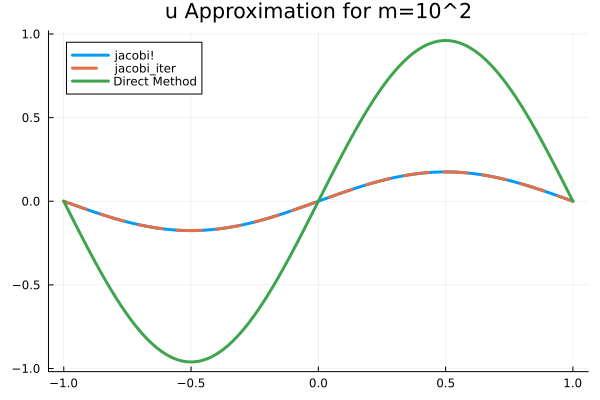

In [195]:
plot(x1, is_u1, linewidth = 3, linestyle=:solid, label= "jacobi!",
    title = "u Approximation for m=10^2")
plot!(x1, ji_u1, linewidth = 3, linestyle=:dash, label= "jacobi_iter")
plot!(x1, dm_u1, linewidth = 3, label= "Direct Method")

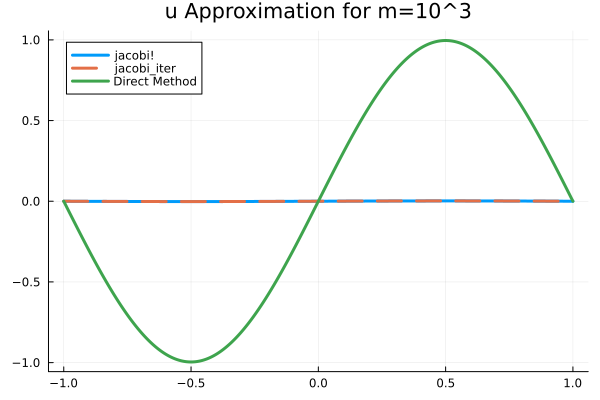

In [196]:
plot(x2, is_u2, linewidth = 3, linestyle=:solid, label= "jacobi!",
    title = "u Approximation for m=10^3")
plot!(x2, ji_u2, linewidth = 3, linestyle=:dash, label= "jacobi_iter")
plot!(x2, dm_u2, linewidth = 3, label= "Direct Method")

At this scale, it is hard to see how <code>jacobi!</code> and <code>jacobi_iter</code> behave. Only plotting these two methods:

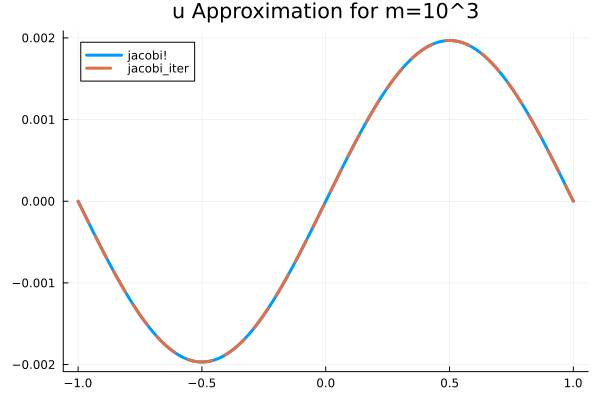

In [197]:
plot(x2, is_u2, linewidth = 3, linestyle=:solid, label= "jacobi!",
    title = "u Approximation for m=10^3")
plot!(x2, ji_u2, linewidth = 3, linestyle=:dash, label= "jacobi_iter")

Similarly for $m=10^4$

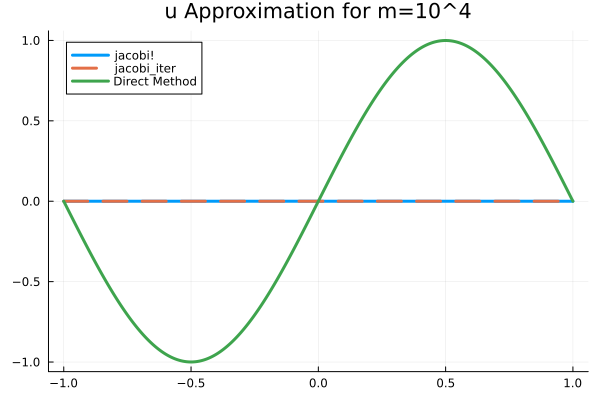

In [198]:
plot(x3, is_u3, linewidth = 3, linestyle=:solid, label= "jacobi!",
    title = "u Approximation for m=10^4")
plot!(x3, ji_u3, linewidth = 3, linestyle=:dash, label= "jacobi_iter")
plot!(x3, dm_u3, linewidth = 3, label= "Direct Method")

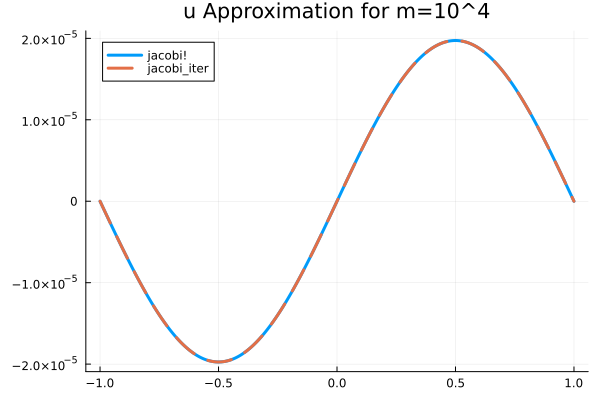

In [199]:
plot(x3, is_u3, linewidth = 3, linestyle=:solid, label= "jacobi!",
    title = "u Approximation for m=10^4")
plot!(x3, ji_u3, linewidth = 3, linestyle=:dash, label= "jacobi_iter")

Upon looking at the graphs for $m=10^{2},10^{3},$ and $10^{4}$, we can see that the difference between the <code>jacobi!</code> Iterative Solvers method and my stationary iterative method <code>jacobi_iter</code> is extremely. In all of our graphs, the <code>jacobi!</code> and <code>jacobi_iter</code> functions overlap. To see exactly the difference in the functions, we will find $e^k$ st.
$$ e^{k} :=  x^{*} - x^k \, , \quad k \ge 0 $$
and then take the norm of this vector.

Evaluating the norm of error for $m = 10^2, 10^3, 10^4$

In [164]:
#Computed error of jacobi! and jacobi_iter methods for each each value of u
#Using first solution
print("For m = 10^2\n")
print("Norm of error between IS Jacobi method and my solution: ", norm(is_u1 - ji_u1))
print("\nNorm of error between Direct Jacobi method and my solution: ", norm(dm_u1 - ji_u1))
print("\nNorm of error between actual solution and my solution: ", norm(u.(x1) - ji_u1))

For m = 10^2
Norm of error between IS Jacobi method and my solution: 5.533611543524396e-16
Norm of error between Direct Jacobi method and my solution: 5.527774981362526
Norm of error between actual solution and my solution: 5.801385266577479

In [165]:
print("For m = 10^3\n")
print("Norm of error between IS Jacobi method and my solution: ", norm(is_u2 - ji_u2))
print("\nNorm of error between Direct Jacobi method and my solution: ", norm(dm_u2 - ji_u2))
print("\nNorm of error between actual solution and my solution: ", norm(u.(x2) - ji_u2))

For m = 10^3
Norm of error between IS Jacobi method and my solution: 1.6408619260592252e-17
Norm of error between Direct Jacobi method and my solution: 22.21636560002714
Norm of error between actual solution and my solution: 22.305511678234776

In [166]:
print("For m = 10^4\n")
print("Norm of error between IS Jacobi method and my solution: ", norm(is_u3 - ji_u3))
print("\nNorm of error between Direct Jacobi method and my solution: ", norm(dm_u3 - ji_u3))
print("\nNorm of error between actual solution and my solution: ", norm(u.(x3) - ji_u3))

For m = 10^4
Norm of error between IS Jacobi method and my solution: 5.952816627107119e-19
Norm of error between Direct Jacobi method and my solution: 70.67747221076215
Norm of error between actual solution and my solution: 70.70574708604245

After taking the norm of error between the three methods above and my stationary iterative method, for $m = 10^2, 10^3, 10^4$, we can see that as $m$ increases, our solution gets closer in approximation to the Iterative Solvers method. Contrastly, the direct method and actual solution get further away. In fact, the norm of error between the direct method and actual solution are within .0282 of each other.

#### Timing Excecutions

In [168]:
@time jacobi_iter(A1,b1,100)
@time jacobi!(is_u1, A1, b1, maxiter=100)
@time A1\b1;

  0.022090 seconds (1.71 k allocations: 23.420 MiB)
  0.000336 seconds (3 allocations: 976 bytes)
  0.000173 seconds (7 allocations: 80.016 KiB)


When testing our solutions for $m = 10^{2}$ using the <code>@time</code> macro, we see that the Iterative Solvers Jacobi method uses 3 allocations, which is the lowest by far. The second least amount of allocations we see is the direct method using the <code> \ </code> operator which makes 7 allocations. After many tests, the method most often with the shortest running time is the direct method. In second place is the Iterative Solvers method which takes mostly double the time. In last place for both memory allocation and running time is the stationary iterative Jacobi method I constructed.

In [170]:
@time jacobi_iter(A2,b2,100)
@time jacobi!(is_u2, A2, b2, maxiter=100)
@time A2\b2;

  0.914633 seconds (2.11 k allocations: 2.253 GiB, 19.95% gc time)
  0.034167 seconds (4 allocations: 7.922 KiB)
  0.009497 seconds (9 allocations: 7.645 MiB)


When testing our solutions for $m = 10^{3}$ using the <code>@time</code> macro, we see once again see that the Iterative Solvers method uses the least amount of allocations, followed by the direct method, and then my solution with 4, 9, and 2,110,000 allocations respectively. Also similar to the results for $m = 10^{2}$, the direct method is the fastest, then Iterative Solvers, then my solution.

In [171]:
@time jacobi_iter(A3,b3,100)
@time jacobi!(is_u3, A3, b3, maxiter=100)
@time A3\b3;

166.380987 seconds (2.11 k allocations: 225.038 GiB, 19.04% gc time)
  5.986442 seconds (4 allocations: 78.234 KiB)
  4.670566 seconds (9 allocations: 763.092 MiB, 1.87% gc time)


When testing our solutions for $m = 10^{4}$ we see the same allocation values for all three methods when compared to our solutions for $m = 10^{3}$. Just like our previous tests for $m = 10^{2}, 10^{3}$ the direct method has the shortest run time, Iterative Solvers second shortest, and my derived solution the longest. 